AB Testing


In [29]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import scipy.stats as scs

In [4]:
df = pd.read_csv("../data/AdSmartABdata.csv")

In [5]:
df.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [6]:
# checking the size of the data
df.shape

(8077, 9)

In [7]:
# checking for missing values
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

1. Which online users belong to the control and exposed groups?

In [8]:
df.groupby("experiment")["auction_id"].count()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

2. How are the users targeted?


3. Could we use the counts of yes and no answers to make a judgement on which experiment is 
performing better? For example if #yes > #no for the exposed group than the control group, 
could we declare that the ad had a significant impact Why or why not?


In [14]:
agg = df.groupby("experiment").agg(
{"yes":"sum"})


In [15]:
agg

,yes
experiment,
control,264
exposed,308


In [16]:
agg = df.groupby("experiment").agg(
{"no":"sum"})

In [17]:
agg

,no
experiment,
control,322
exposed,349


4. What is the statistical process that generates the data? Which kind of statistical model will you 
use if you were to simulate the data?


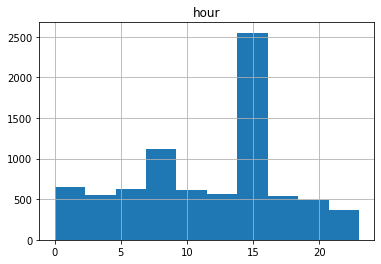

In [18]:
df.hist(["hour"]); # normal distribution

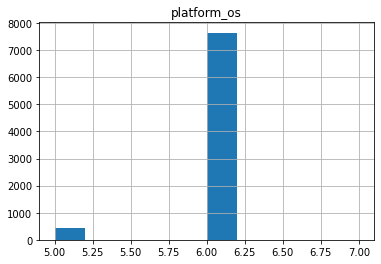

In [19]:
df.hist(["platform_os"]);

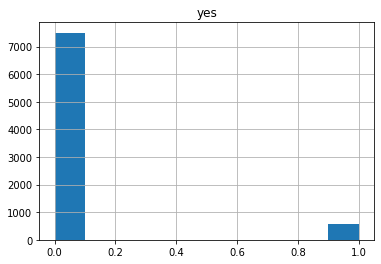

In [20]:
df.hist(["yes"]);

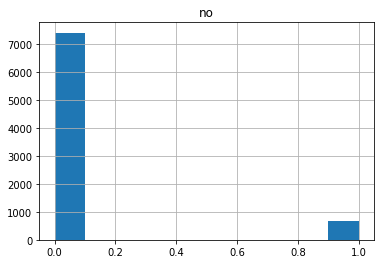

In [21]:
df.hist(["no"]);

5. Assessment of the statistical significance of an A/B test is dependent on what kind of probability 
distribution the experimental data follows. Given your answer above, which statistical 
tests (z-test, t-test, etc.) are appropriate to use for this project?


In [25]:
conditions = [df.yes == 1 , df.no == 1]
choices = [1, 0]
df['y'] = np.select(conditions, choices, default=2)

In [26]:
y = df.y
x = df[['hour','platform_os','yes','no']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
result =  model.summary()

In [27]:
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.297e+31
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        04:16:04   Log-Likelihood:             2.5624e+05
No. Observations:                8077   AIC:                        -5.125e+05
Df Residuals:                    8072   BIC:                        -5.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0000    1.2e-15   1.67e+15      0.000       2.000       2.000
hour         5.117e-17   7.84e-18      6.530      0.000    3.58e-17    6.65e-17
platform_os -7.355e-16   2.01e-16     -3.662      0.000   -1.13e-15   -3.42e-16
yes            -1.0000   1.76e-16  -5.68e+15      0.000      -1.000      -1.000
no             -2.0000   1.64e-16  -1.22e+16      0.000      -2.000      -2.000
==============================================================================
Omnibus:                     3756.805   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16838.985
Skew:                           2.328   Prob(JB):                         0.00
Kurtosis:                       8.326   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. In classical (frequentist) A/B testing, we use p-values to measure the significance of the experimental 
feature (being exposed to an ad in our case)  over the null hypothesis (the hypothesis that there is no 
difference in brand awareness between the exposed and control groups in the current case). 
How are p-values computed? What information do p-values provide? 
What are the  type-I and type-II errors you may have in the analysis? 
Can you comment on which error types p-values are related?


7. Perform data exploration to count unique values of categorical variables, 
make histogram, relational, and other necessary plots to help understand the data. 
For each of the plots you produce, write a description of what the plot shows in markdown cells.


In [110]:
DP = DistributionPlots()

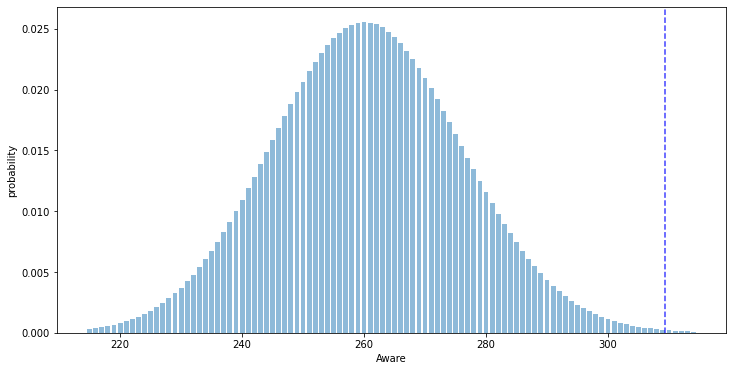

In [111]:
DP.cont_distribution(264,4071,0.064,0.076)

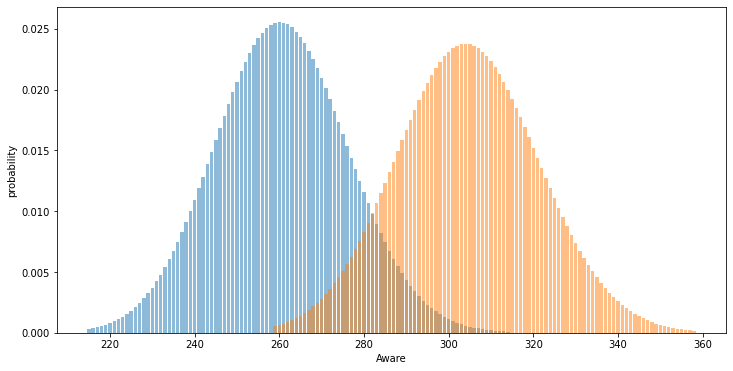

In [112]:
DP.cont_exp_distribution(264,308,4071,4006,0.064,0.076)

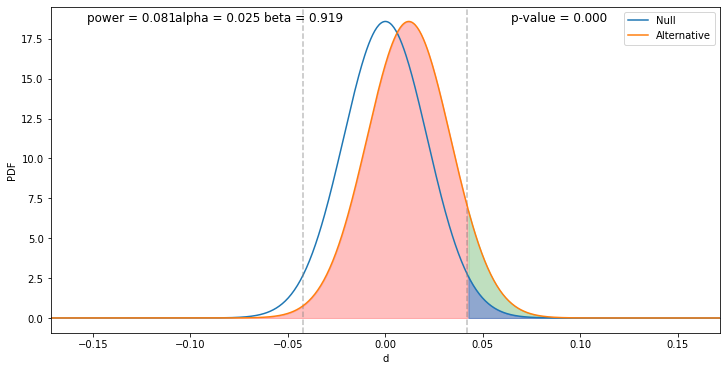

In [113]:
DP.null_alt_distribution(264,308,0.064,0.076)

In [ ]:
#REFERENCE
# A Conditional Sequential Test for the Equality of Two Binomial Proportions
# William Q. Meeker, Jr
# Journal of the Royal Statistical Society. Series C (Applied Statistics)
# Vol. 30, No. 2 (1981), pp. 109-115
class ConditionalSPRT:
    def __init__(self,exposed,control,odd_ratio,alpha=0.05,beta=0.10,stop=None):
        self.exposed = exposed
        self.control = control
        self.odd_ration = odd_ration
            
    def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
      """
       #
      # Meeker's SPRT for matched `x` (treatment) and `y` (control), 
      # both indicator responses, likelihood ratio t1, error rates alpha and beta,
      # and (optionally) truncation after trial stop.
      #
      # The return variable contains these elements:
      #(outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)
      # * outcome:   "continue," "reject null," or "accept null".
      # * n: number observation used for the decsion
      # * k:     Index at which the outcome decision was made (or NA)
      # * l:     lower critical point
      # * u:     upper critical point
      # * truncate_decision: The approximate decision made after truncate point
      # * truncated: If the test was truncated, the value of `n.0`; NA otherwise
      # * x1:       Original data `x`, cumulative
      # * r:         Cumulative sum of x+y
      # * stats:     Series of cumulative sums of log probability ratios
      # * limits:    Two rows giving lower and upper critical limits, respectively
      #
      """
            if t1<=1:
                printLog('warning',"Odd ratio should exceed 1.")
            if (alpha >0.5) | (beta >0.5):
                printLog('warning',"Unrealistic values of alpha or beta were passed."
                         +" You should have good reason to use large alpha & beta values")
            if stop!=None:
                stop=math.floor(n0)

            def comb(n, k):
                return factorial(n) // factorial(k) // factorial(n - k)

            def lchoose(b, j):
                a=[]
                if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                    if len(j)<2:
                        j=j[0]
                if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                    for k in j:
                        n=b
                        if (0 <= k) & (k<= n):
                            a.append(math.log(comb(n,k)))
                        else:
                            a.append(0)
                else:
                    n=b
                    k=j
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)

                return np.array(a)

            def g(x,r,n,t1,t0=1):
              """
             #
              # Meeker's (1981) function `g`, the log probability ratio.
              # 
              """
                return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

            def h(x,r,n,t=1):
              """
              #
              # Reciprocal of Meeker's (1981) function `h`: the conditional probability of 
              # `x` given `r` and `n`, when the odds ratio is `t`.
              #
              # `x` is his "x1", the number of positives in `n` control trials.
              # `r` is the total number of positives.
              # `n` is the number of (control, treatment) pairs.
              # `t` is the odds ratio.
              #
              """
                return f(r,n,t,offset=ftermlog(x,r,n,t))

            def f(r,n,t,offset=0):
              """#
              # Meeker's (1981) function exp(F(r,n,t)), proportional to the probability of 
              #  `r` (=x1+x2) in `n` paired trials with an odds ratio of `t`.
              #
              # This function does *not* vectorize over its arguments.
              #"""
                upper=max(0,r-n)
                lower=min(n,r)
                rng=list(range(upper,lower+1))
                return np.sum(fterm(rng,r,n,t,offset))

            def fterm(j,r,n,t,offset=0):
                ftlog=ftermlog(j,r,n,t,offset)
                return np.array([math.exp(ex) for ex in ftlog])

            def ftermlog(j,r,n,t,offset=0):
              """
              #
              # Up to an additive constant, the log probability that (x1, x1+x2) = (j, r) 
              # in `n` paired trials with odds ratio of `t`.
              #
              # `offset` is used to adjust the result to avoid under/overflow.
              #
              """
                xx=r-j
                lch=lchoose(n,j)
                lchdiff=lchoose(n,xx)
                lg=np.array(j)*math.log(t)
                lgsum=lch+lchdiff
                lgsum2=lgsum+lg
                lgdiff=lgsum2-offset

                return lgdiff

            def logf(r,n,t,offset=0):
              """
              #
              # A protected vesion of log(f), Meeker's function `F`.
              #
              """
                z=f(r,n,t,offset)
                if z>0:
                    return math.log(z)
                else:
                    return np.nan

            def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
              """
               #
              # Meeker's (1981) functions c_L(r,n) and c_U(r,n), the  critical values for x1.
              # 0 <= r <= 2n; t1 >= t0 > 0.
              #
              """
                offset=ftermlog(math.ceil(r/2),r,n,t1c)
                z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
                a=-math.log(alpha/(1-beta))
                b=math.log(beta/(1-alpha))
                lower=b
                upper=1+a
                return (np.array([lower,upper])+z)/math.log(t1c/t0)

            l=math.log(beta/(1-alpha))
            u=-math.log(alpha/(1-beta))
            sample_size=min(len(x),len(y))
            n=np.array(range(1,sample_size+1))

            if stop!=None:
                n=np.array([z for z in n if z<=stop])
            x1=np.cumsum(x[n-1])
            r=x1+np.cumsum(y[n-1])
            stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g
             #
              # Perform the test by finding the first index, if any, at which `stats`
              # falls outside the open interval (l, u).
              #
            clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
            limits=[]
            for v in clu:
                inArray=[]
                for vin in v:
                    inArray.append(math.floor(vin))
                limits.append(np.array(inArray))
            limits=np.array(limits)

            k=np.where((stats>=u) | (stats<=l))
            cvalues=stats[k]
            if cvalues.shape[0]<1:
                k= np.nan
                outcome='Unable to conclude.Needs more sample.'
            else:
                k=np.min(k)
                if stats[k]>=u:
                    outcome=f'Exposed group produced a statistically significant increase.'
                else:
                    outcome='Their is no statistically significant difference between two test groups'
            if (stop!=None) & (k==np.nan):
              #
              # Truncate at trial stop, using Meeker's H0-conservative formula (2.2).
              # Leave k=NA to indicate the decision was made due to truncation.
              #
                c1=clowerUpper(r,stop,t1,alpha,beta)
                c1=math.floor(np.mean(c1)-0.5)
                if x1[n0]<=c1:
                    truncate_decision='h0'
                    outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
                else:
                    truncate_decision='h1'
                    outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
                truncated=stop
            else:
                truncate_decision='Non'
                truncated=np.nan
            return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)